In [46]:
using Plots,StaticArrays,Printf

# Newton-Raphson method

#f[1] : η=-ϵcotϵ
#f[2] : η²+ϵ²=2mV₀R²/ħ²

function func!(x,p)
    fx,jac,rhs,det = p
        fx[1] = -x[1]*cot(x[1])-x[2]
        fx[2] = x[1]^2 + x[2]^2 - rhs
    #Jacobian
        jac[1,1] = -cot(x[1]) + x[1]/(sin(x[1])^2)
        jac[1,2] = -1
        jac[2,1] = 2*x[1]
        jac[2,2] = 2*x[2]
    return fx,jac
end

# constants
N = 2                # A number of equation to be solved
NumofParameters = 9  # A number of parameters
ntrial=8             # A number of trial of Newton-Raphson method
tolx=10e-5           # torelate value of x
tolf=10e-5           # torelate value of f
errf=0.0             
errx=0.0

# Vectors
R = zeros(NumofParameters)
RHS = zeros(NumofParameters)
η = zeros(NumofParameters)
jac = zeros(MMatrix{N,N})
fx = zeros(N)
b = zeros(N)
δx = zeros(N)
xini = zeros(N)

# physical constants
ħ²=197.33^2                          # ħ²
A = [208,139,89,51,28,16,13,12,10]   # mass number
E = zeros(NumofParameters)           # energy
m = 1115.7                           # MeV/c² : mass of Λ particle 
V₀ = 25.0                             # MeV    : srength of boundary potential 
@. R = 1.1*A^(1/3)                   # fm     : atomic radii
@. RHS = 2.0*m*V₀*R*R/ħ²             # r.h.s. of equation :2mV₀R²/ħ²

for i=1:NumofParameters
    #@printf("RHS[%d]=%.2f\n",i,RHS[i])
end
println("")
    
# initial values of Newton-Raphton method ここを行列にして扱うことができる． 
x0 = 2.5  # initial value
det=1     # det=0:even，det=1:odd
XINI=[[x0,8.0],[x0,6.7],[x0,6.0],  
      [x0,5.0],[x0,3.0],[x0,2.5],
      [x0,2.0],[x0,2.0],[x0,2.0]]

#XINI=[[2.5,2.5],[2.2,1.5],[1.9,1.5],  
#      [1.8,0.8],[1.7,0.5],[1.0,-0.5],
#      [1.0,-0.5],[1.0,-0.5],[1.0,-0.5]]

rhs=0.0

#NR method
@time for i=1:NumofParameters
    rhs  = RHS[i]
    xini = XINI[i]
    p    = (;fx,jac,rhs,det)
    #@printf("Trial#%d\n",i)
# Newton-Raphson method
for i=1:ntrial
    fx,jac=func!(xini,p)
    errf=sum(abs(fx[i]) for i=1:N)
    #@printf("errf(%d)=%.3e\n",i,errf)
    if errf < tolf
        print("")
    else 
        b = -fx
        δx = jac\b
        errx=sum(abs(δx[i]) for i=1:N)
        #@printf("errx(%d)=%.3e\n\n",i,errx)
        xini += δx     
    end
end
    #@printf("errf(%d)=%.3e\n",i,errf)
    #@printf("errx(%d)=%.3e\n",i,errx)
    XINI[i][1]=xini[1]
    XINI[i][2]=xini[2]
    #println(XINI[i])
    #println("")
end
@printf("Finishing NR method\n")

#println("XINI=",XINI)
#println("E[]=",E)

#@. E = -XINI^2*ħ²/(2*m*R^2)

for i=1:NumofParameters
    η[i] = XINI[i][2]
end

#println("η=",η)

@. E= - η * η * ħ²/(2.0*m*R^2)

XINI

Values = []
for i=1:NumofParameters
    dum = [(XINI[i][1],XINI[i][2])]
    push!(Values, dum)
end

scatter(Values[1],label="a",xlim=(0,10),ylim=(0,10))
scatter!(Values[2],label="b")
scatter!(Values[3],label="c")
scatter!(Values[4],label="d")
scatter!(Values[5],label="e")
scatter!(Values[6],label="f")
scatter!(Values[7],label="g")
scatter!(Values[8],label="h")
scatter!(Values[9],label="i")

#実験データ
sΛ = [26.9, 25.1, 23.5, 21.5, 17.2, 13.0, 12.0, 12.36, 8.7]

E
for i=1:9
    @printf("sΛ=%.2f  E=%.2f\n",-sΛ[i],E[i])
end
@printf("\n")
for i=1:9
    @printf("ϵ=%.2f  η=%.2f  E=%.2f\n",Values[i][1][1],Values[i][1][2],E[i])
end
@printf("\n")

#V₀の値を変化させて考える必要がある．
#また，残差を求め，どのぐらいの一致が見られるか定量化する必要がある．

#まずは残差を求める

Δ = [0.0 for i=1:9]

@. Δ = abs(sΛ - abs(E))/sΛ

for i=1:9
    @printf("ϵ=%.2f  η=%.2f  E=%.2f  Δ=%.2e\n",Values[i][1][1],Values[i][1][2],E[i],Δ[i])
end
E
# V₀=30 MeV
#E=[-26.76327685051849,-25.89751727004327,-24.695966270625767,-22.757570551493444,-20.015157449640267,
# -16.75505554195049,-15.367428123441062,-14.807652743843201,-13.483686377956948]

# V₀=3.5 MeV
E_a = [-1.40650386035425,-1.029414676335654,-0.6060914445471169,-0.158294600862274,-0.02213806703743653,
 -0.6804538458688608,-1.2668746418252828,-1.5615000008470894,-2.403312421090276]

# V₀=5 MeV
E_b = [-2.657757809519963,-2.177681419758168,-1.5920513911438008,-0.8372155126970922,-0.1714462063584809,
 -0.0436652946177211,-0.23714895154068716,-0.36220077052779276,-0.7753246563963776]

# V₀=20 MeV
E_c = [-16.91959297545421,-16.12330961980038,-15.033883674655899,-13.313645035360313,-10.959260581359615,
  -8.292142285189247,-7.206318897987594,-6.777630325171763,-5.7871277963885035]

# V₀=25 MeV
E_d = [-21.830637537780998,-20.994944147975414,-19.841991169524515,-17.99833163760667,-15.424767720531557,
 -12.423284775471135,-11.16740398000926,-10.664882562181196,-9.486614078008937]

for i=1:9
    @printf("E_a[i]=%.2f\n",E_a[i])
end


  0.065105 seconds (141.08 k allocations: 8.527 MiB, 95.01% compilation time)
Finishing NR method
sΛ=-26.90  E=-21.83
sΛ=-25.10  E=-20.99
sΛ=-23.50  E=-19.84
sΛ=-21.50  E=-18.00
sΛ=-17.20  E=-15.42
sΛ=-13.00  E=-12.42
sΛ=-12.00  E=-11.17
sΛ=-12.36  E=-10.66
sΛ=-8.70  E=-9.49

ϵ=2.78  η=7.29  E=-21.83
ϵ=2.73  η=6.25  E=-20.99
ϵ=2.67  η=5.24  E=-19.84
ϵ=2.58  η=4.14  E=-18.00
ϵ=2.47  η=3.14  E=-15.42
ϵ=2.35  η=2.34  E=-12.42
ϵ=2.30  η=2.07  E=-11.17
ϵ=2.28  η=1.97  E=-10.66
ϵ=2.23  η=1.75  E=-9.49

ϵ=2.78  η=7.29  E=-21.83  Δ=1.88e-01
ϵ=2.73  η=6.25  E=-20.99  Δ=1.64e-01
ϵ=2.67  η=5.24  E=-19.84  Δ=1.56e-01
ϵ=2.58  η=4.14  E=-18.00  Δ=1.63e-01
ϵ=2.47  η=3.14  E=-15.42  Δ=1.03e-01
ϵ=2.35  η=2.34  E=-12.42  Δ=4.44e-02
ϵ=2.30  η=2.07  E=-11.17  Δ=6.94e-02
ϵ=2.28  η=1.97  E=-10.66  Δ=1.37e-01
ϵ=2.23  η=1.75  E=-9.49  Δ=9.04e-02
E_a[i]=-1.41
E_a[i]=-1.03
E_a[i]=-0.61
E_a[i]=-0.16
E_a[i]=-0.02
E_a[i]=-0.68
E_a[i]=-1.27
E_a[i]=-1.56
E_a[i]=-2.40


[60.85442070865358, 46.51500901491178, 34.5549217405465, 23.839475348379597, 15.984115050324164, 11.006854639493044, 9.583970703748893, 9.085958314691082, 8.046059551952062]
  0.000013 seconds (14 allocations: 976 bytes)
  0.000019 seconds (39 allocations: 1.250 KiB)


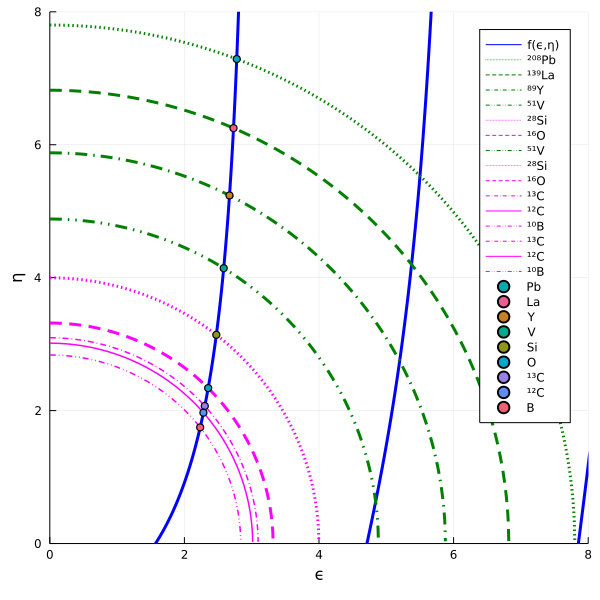

In [49]:
#グラフを描画して確認するセル

using Plots

R = zeros(NumofParameters)
RHS = zeros(NumofParameters)

ħ²=197.33^2                          #ħ²
A = [208,139,89,51,28,16,13,12,10]   #mass number
m = 1115.7                           #MeV/c² : mass of Λ particle 
V₀ = 25.0                             #MeV : srength of boundary potential 
det=0                                #det=0 偶関数，det=1 奇関数
@. R = 1.1*A^(1/3)                   #R: atomic radii
@. RHS = 2.0*m*V₀*R*R/ħ²

println(RHS)

L = []
H = []
Plot = []

#f[1]のプロット範囲
@time for i=0:10
    left  = i*pi+10e-5
    right = (i+1)*pi-10e-5
    l = range(left,right ; length=1001)
    push!(L,l)
end

#f[2]のプロット範囲
@time for i=1:9
    hx = range(0,sqrt(RHS[i])-10e-5 ; length=1001)
    push!(H,hx)
end

f(x)=-x*cot(x)
hi(i,x)=sqrt(RHS[i]-x^2)

xscale=600
yscale=600

plot(L[1],
    f.(L[1]),
    xlim=(0,8),ylim=(0,8),
    lw=3,
    lc=:blue,
    label="f(ϵ,η)",
    xlabel="ϵ",ylabel="η",
    size=(xscale,yscale)
)

plot!(L[2],f.(L[2]),lw=3,lc=:blue,label="")
plot!(L[3],f.(L[3]),lw=3,lc=:blue,label="")
plot!(L[4],f.(L[4]),lw=3,lc=:blue,label="")
plot!(L[5],f.(L[5]),lw=3,lc=:blue,label="")
plot!(L[6],f.(L[6]),lw=3,lc=:blue,label="")


plot!(H[1],hi.(1,H[1]),lw=3,lc=:green,line=:dot,label="²⁰⁸Pb")
plot!(H[2],hi.(2,H[2]),lw=3,lc=:green,line=:dash,label="¹³⁹La")
plot!(H[3],hi.(3,H[3]),lw=3,lc=:green,line=:dashdot,label="⁸⁹Y")

plot!(H[4],hi.(4,H[4]),lw=3,lc=:green,line=:dashdotdot,label="⁵¹V")
plot!(H[5],hi.(5,H[5]),lw=3,lc=:magenta,line=:dot,label="²⁸Si")
plot!(H[6],hi.(6,H[6]),lw=3,lc=:magenta,line=:dash,label="¹⁶O")
plot!(H[4],-hi.(4,H[4]),lw=3,lc=:green,line=:dashdotdot,label="⁵¹V")
plot!(H[5],-hi.(5,H[5]),lw=3,lc=:magenta,line=:dot,label="²⁸Si")
plot!(H[6],-hi.(6,H[6]),lw=3,lc=:magenta,line=:dash,label="¹⁶O")

plot!(H[7],hi.(7,H[7]),lw=1.5,lc=:magenta,line=:dashdot,label="¹³C")
plot!(H[8],hi.(8,H[8]),lw=1.5,lc=:magenta,line=:solid,label="¹²C")
plot!(H[9],hi.(9,H[9]),lw=1.5,lc=:magenta,line=:dashdotdot,label="¹⁰B")
plot!(H[7],-hi.(7,H[7]),lw=1.5,lc=:magenta,line=:dashdot,label="¹³C")
plot!(H[8],-hi.(8,H[8]),lw=1.5,lc=:magenta,line=:solid,label="¹²C")
plot!(H[9],-hi.(9,H[9]),lw=1.5,lc=:magenta,line=:dashdotdot,label="¹⁰B")

scatter!(Values[1],label="Pb")
scatter!(Values[2],label="La")
scatter!(Values[3],label="Y")
scatter!(Values[4],label="V")
scatter!(Values[5],label="Si")
scatter!(Values[6],label="O")
scatter!(Values[7],label="¹³C")
scatter!(Values[8],label="¹²C")
scatter!(Values[9],label="B")



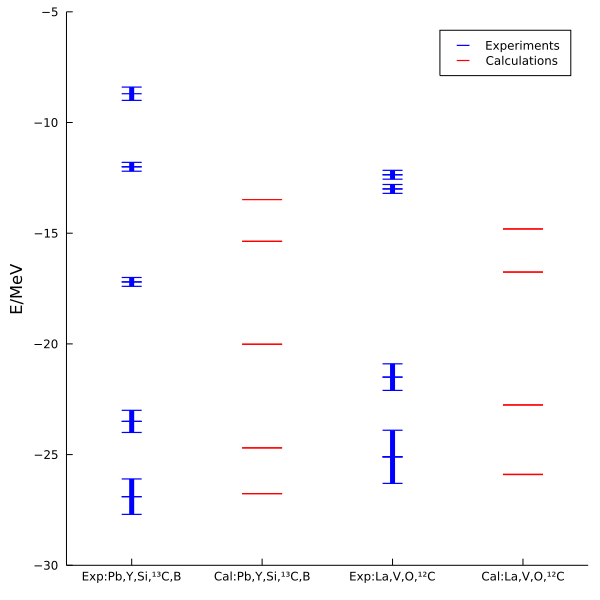

In [47]:
using Plots


N = 9

label1 = ["Exp:Pb,Y,Si,¹³C,B" for i=1:N] 
label2 = ["Exp:La,V,O,¹²C" for i=1:N] 
label_cal1 = ["Cal:Pb,Y,Si,¹³C,B" for i=1:N] 
label_cal2 = ["Cal:La,V,O,¹²C" for i=1:N] 
    
ticks_y = [-30+5*i for i=0:6]

sΛ = [26.9, 25.1, 23.5, 21.5, 17.2, 13.0, 12.0, 12.36, 8.7]
δs = [0.8, 1.2, 0.5, 0.6, 0.2, 0.2, 0.2, 0.20, 0.3]

sΛ1 = [26.9, 23.5, 17.2, 12.0, 8.7]
sΛ2 = [25.1, 21.5, 13.0, 12.36]
δs1 = [0.8, 0.5, 0.2, 0.2, 0.3]
δs2 = [1.2, 0.6, 0.2, 0.20]

E = [-26.76327685051849,
 -25.89751727004327,
 -24.695966270625767,
 -22.757570551493444,
 -20.015157449640267,
 -16.75505554195049,
 -15.367428123441062,
 -14.807652743843201,
 -13.483686377956948]

E1 = [-26.76327685051849,
 -24.695966270625767,
 -20.015157449640267,
 -15.367428123441062,
 -13.483686377956948]

E2 = [-25.89751727004327,
 -22.757570551493444,
 -16.75505554195049,
 -14.807652743843201]

scatter(label1,-sΛ1,
    #marker=5,
    add_marker = true,
    markershape=:hline,
    mcolor=:blue,
    msize=10,
    markerstrokewidth=5,
    markerstrokecolor=:blue,
    grid=:false,
    label = "Experiments",
    ylabel="E/MeV",
    yerror=δs1,
    legend = :topright,
    xlim=(0,4),
    ylim=(-30,-5),
    yticks=ticks_y,
    size = (600,600)
)

scatter!(label_cal1,E1,
    add_marker = true,
    markershape=:hline,
    mcolor=:red,
    msize=20,
    markerstrokewidth=20,
    markerstrokecolor=:red,
    grid=:false,
    label = "Calculations"
)
scatter!(label2,-sΛ2,
    #marker=5,
    add_marker = true,
    markershape=:hline,
    mcolor=:blue,
    msize=10,
    markerstrokewidth=5,
    markerstrokecolor=:blue,
    grid=:false,
    label = "",
    yerror=δs2
)
    
scatter!(label_cal2,E2,
    add_marker = true,
    markershape=:hline,
    mcolor=:red,
    msize=20,
    markerstrokewidth=20,
    markerstrokecolor=:red,
    grid=:false,
    label = ""
)

#savefig("levels.pdf")